In [1]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from sklearn.preprocessing import MinMaxScaler

# plotting modules
import seaborn as sns
import missingno
import matplotlib.pyplot as plt



df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,B42,S


In [2]:
df.tail

<bound method NDFrame.tail of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [ ]:

#data Shape
df.shape

In [4]:
#data description
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#showing each columns uniques
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [7]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [14]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [9]:
df.drop('Parch',axis=1, inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,237736,30.0708,NaN,C


In [10]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

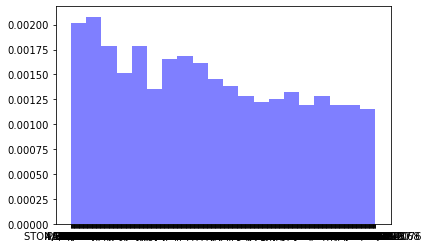

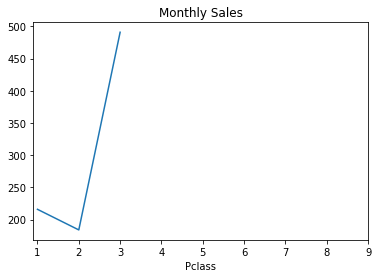

In [15]:
plt.hist(df['Ticket'], 20, density =3,facecolor="blue", alpha=0.5)
plt.show()

test = df['Ticket'].groupby(df['Pclass']).size()
plot_month = test.plot(title = 'Monthly Sales', xticks = (range(1,10)))



In [12]:
Num_of_passangers = df.groupby('Survived').size()

print(Num_of_passangers)

Survived
0    549
1    342
dtype: int64


In [16]:
Age_ = df.groupby('Fare').size()

print(Age_)

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64


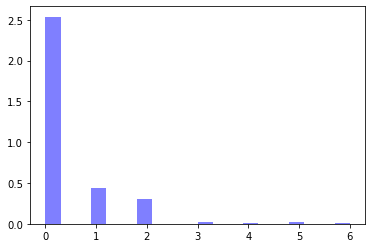

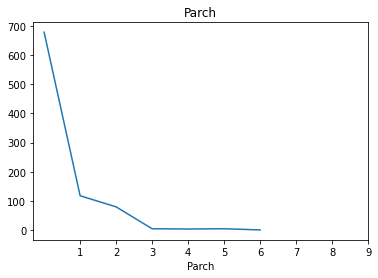

In [97]:
plt.hist(df['Parch'], 20, density =3,facecolor="blue", alpha=0.5)
plt.show()

test = df['Parch'].groupby(df['Parch']).size()
plot_month = test.plot(title = 'Parch', xticks = (range(1,10)))


Text(0, 0.5, 'Total SibSp')

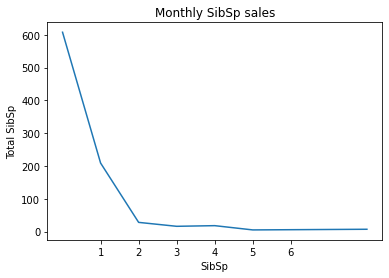

In [94]:
Num_of_sales = df.groupby('SibSp').size()
plot_month = Num_of_sales.plot(title = 'Monthly SibSp sales', xticks = (1,2,3,4,5,6))
plot_month.set_xlabel('SibSp')
plot_month.set_ylabel('Total SibSp')


Text(0, 0.5, 'Total Sex')

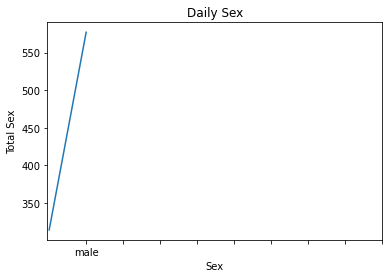

In [93]:
Num_of_passangers = df.groupby('Sex').size()
plot_month = Num_of_passangers.plot(title = 'Daily Sex', xticks = (range(1,10)))
plot_month.set_xlabel('Sex')
plot_month.set_ylabel('Total Sex')

Text(0, 0.5, 'Total Age Sales')

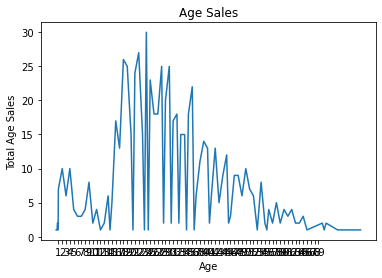

In [92]:
sales_by_month = df.groupby('Age').size()
plot_month = sales_by_month.plot(title = 'Age Sales', xticks = (range(1,70)))
plot_month.set_xlabel('Age')
plot_month.set_ylabel('Total Age Sales')

In [91]:
df = pd.read_csv("Titanic.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<AxesSubplot:>

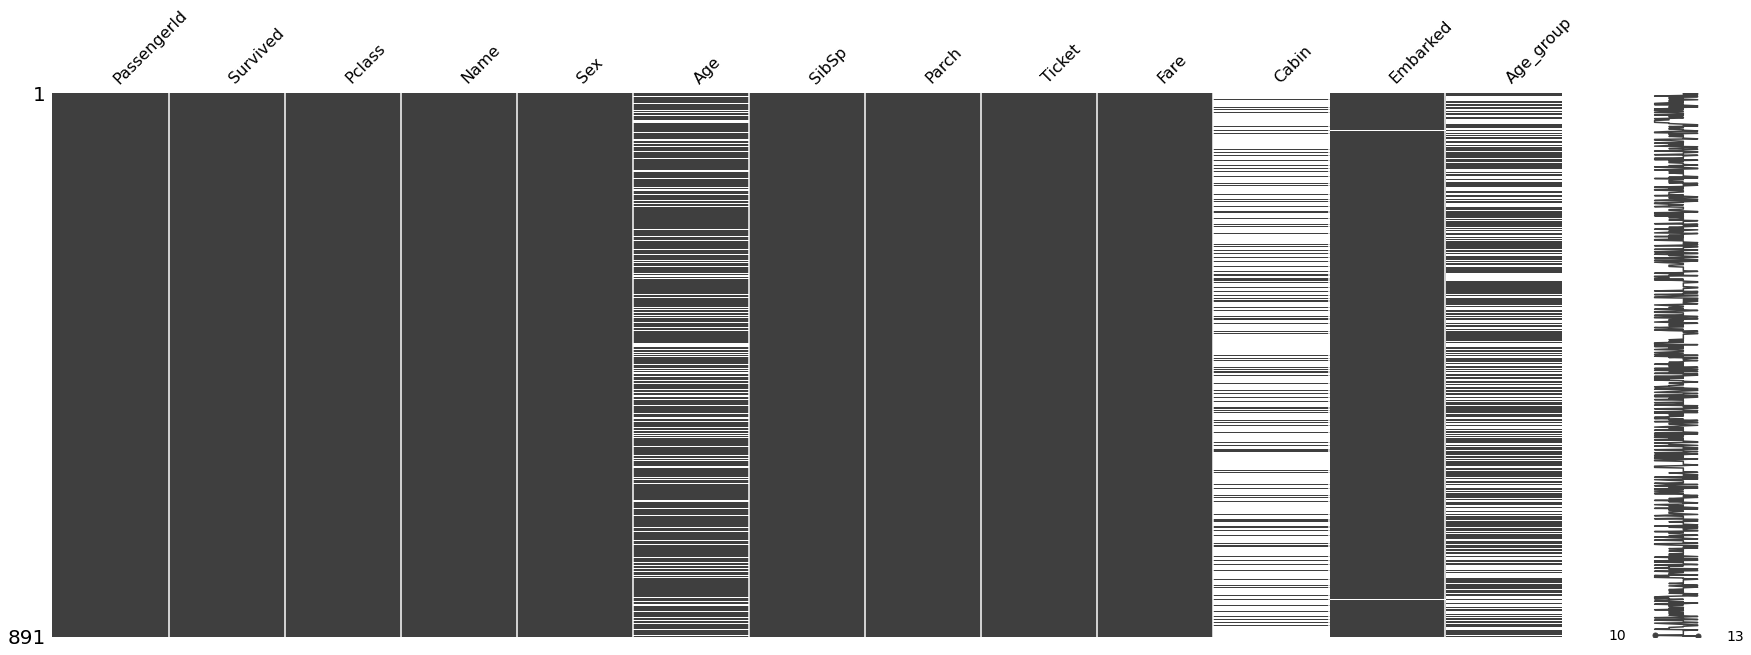

In [90]:
# Plot graphic of missing values
missingno.matrix(df, figsize = (30,10))

male      577
female    314
Name: Sex, dtype: int64


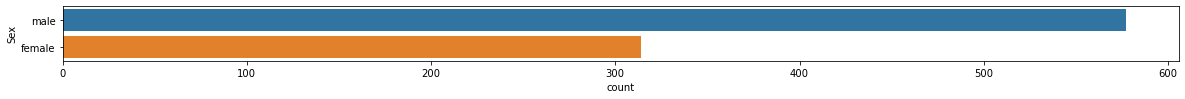

In [89]:
# How many clients are Male and Female
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=df);
print(df.Sex.value_counts())

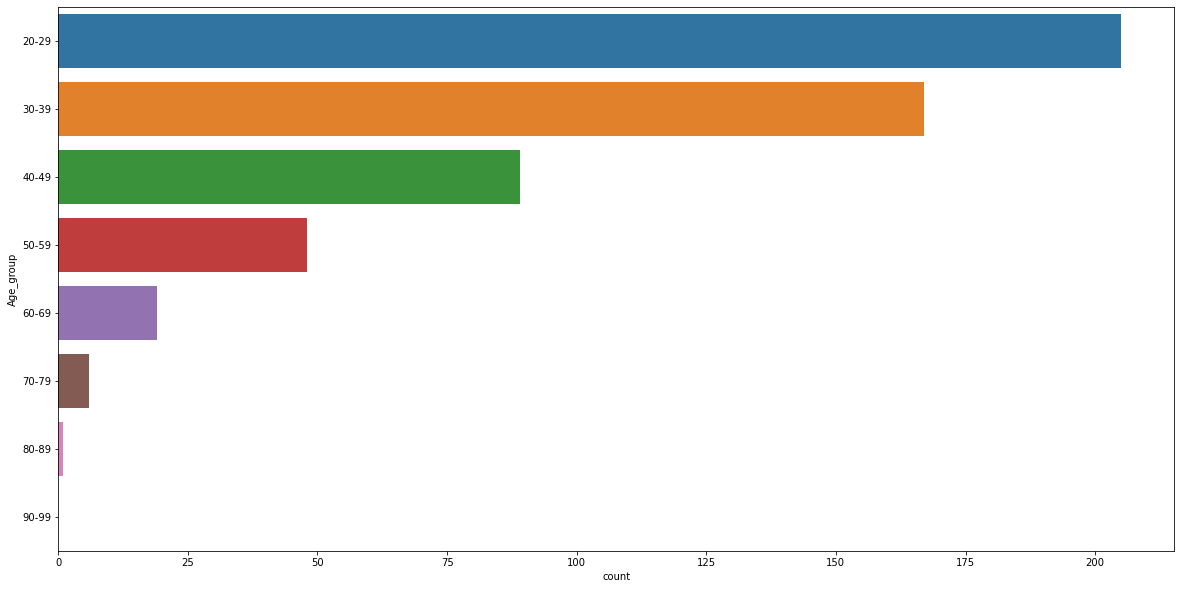

In [88]:
df['Age_group'] = pd.cut(df['Age'], [20, 29, 39,49, 59,69,79,89,99], 
                   labels=['20-29', '30-39', '40-49','50-59','60-69','70-79',
                           '80-89','90-99'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df['Age_group'], data=df);

C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

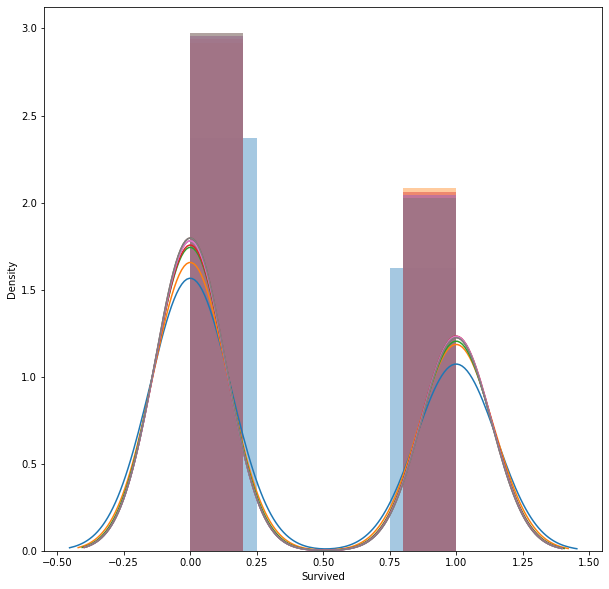

In [87]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Age'] < 29 ]['Survived'], kde_kws={'label': 'Age < 29'});
sns.distplot(df.loc[df['Age'] < 39 ]['Survived'], kde_kws={'label': 'Age < 39'});
sns.distplot(df.loc[df['Age'] < 49 ]['Survived'], kde_kws={'label': 'Age < 49'});
sns.distplot(df.loc[df['Age'] < 59 ]['Survived'], kde_kws={'label': 'Age < 59'});
sns.distplot(df.loc[df['Age'] < 69 ]['Survived'], kde_kws={'label': 'Age < 69'});
sns.distplot(df.loc[df['Age'] < 79 ]['Survived'], kde_kws={'label': 'Age < 79'});
sns.distplot(df.loc[df['Age'] < 69 ]['Survived'], kde_kws={'label': 'Age < 89'});
sns.distplot(df.loc[df['Age'] < 79 ]['Survived'], kde_kws={'label': 'Age < 99'});




C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

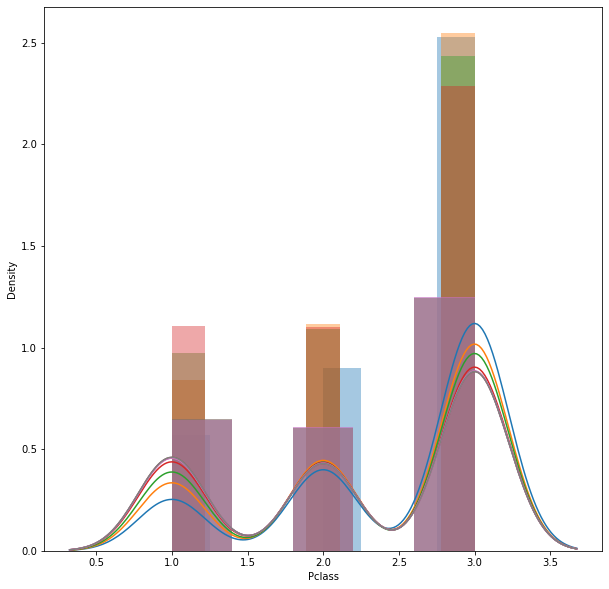

In [86]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Age'] < 29 ]['Pclass'], kde_kws={'label': 'Age < 29'});
sns.distplot(df.loc[df['Age'] < 39 ]['Pclass'], kde_kws={'label': 'Age < 39'});
sns.distplot(df.loc[df['Age'] < 49 ]['Pclass'], kde_kws={'label': 'Age < 49'});
sns.distplot(df.loc[df['Age'] < 59 ]['Pclass'], kde_kws={'label': 'Age < 59'});
sns.distplot(df.loc[df['Age'] < 69 ]['Pclass'], kde_kws={'label': 'Age < 69'});
sns.distplot(df.loc[df['Age'] < 79 ]['Pclass'], kde_kws={'label': 'Age < 79'});
sns.distplot(df.loc[df['Age'] < 69 ]['Pclass'], kde_kws={'label': 'Age < 89'});
sns.distplot(df.loc[df['Age'] < 79 ]['Pclass'], kde_kws={'label': 'Age < 99'});




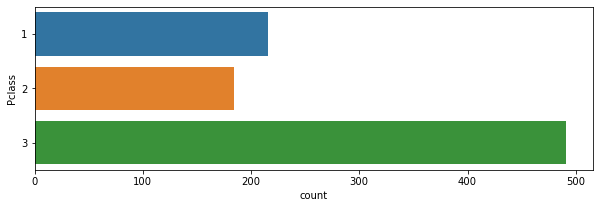

In [85]:
fig = plt.figure(figsize=(10,3))
sns.countplot(y=df['Pclass'], data=df);

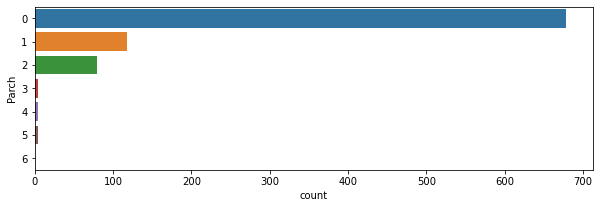

In [84]:
fig = plt.figure(figsize=(10,3))
sns.countplot(y=df['Parch'], data=df);

C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

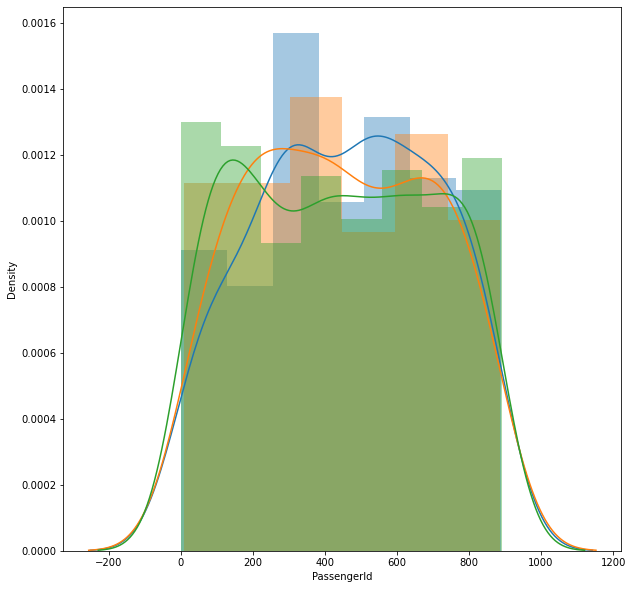

In [82]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df.loc[df['Pclass'] == 1]['PassengerId'], kde_kws={'label': 'Pclass = 1'});
sns.distplot(df.loc[df['Pclass'] == 2]['PassengerId'], kde_kws={'label': 'Pclass = 2'});
sns.distplot(df.loc[df['Pclass'] == 3]['PassengerId'], kde_kws={'label': 'Pclass = 2'});
sns.distplot(df.loc[df['Pclass'] == 4]['PassengerId'], kde_kws={'label': 'Pclass = 2'});
sns.distplot(df.loc[df['Pclass'] == 5]['PassengerId'], kde_kws={'label': 'Pclass = 2'});
sns.distplot(df.loc[df['Pclass'] == 6]['PassengerId'], kde_kws={'label': 'Pclass = 2'});


In [81]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
corelation = df.corr()

<AxesSubplot:>

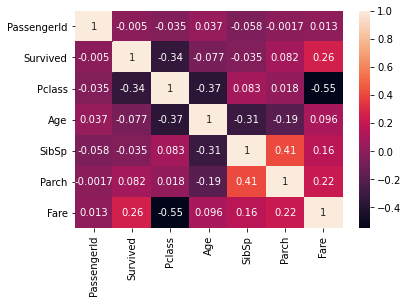

In [54]:
sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [ ]:
#My EDA Consists of a Titanic data set which contains No of passengers, Names, Fares, Tickets, their age, No of survivers
#and the type of suit class they booked. 
#The cabin column has so many Nans they are dropped. I had to describe the data set, checked the unique values, dropped the parch column since i have no understanding what its there for.
#even shaped the data set and check the number of missing points in a column.

In [ ]:
#With my visuals I had to start with the histo and check the sales of tickets, with pclass and number of tickets i had a line chart and it seems to be rising.

#I plotted a hist for the parch column and the numbers seem to be decreasing from biggest to smallest even with the line chart.

#The Sales of age in a line graph differ but the middle aged class are the ones with the higest purchases.

#I Found the missingno.matrix and the dist graphs interesting they appear so smoothly. Worse the sns heatwave map is amazing !!!
